<a href="https://colab.research.google.com/github/Berkay86/DeepPerson/blob/main/LSTM%20MODEL%20SENTIMENT%20ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#Kütüphanelerimizi içeriye alalım.
#Veri İşlemleri
!pip3 install snscrape
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string


In [28]:
import re 
import textblob
from textblob import TextBlob

In [29]:
from wordcloud.wordcloud import WordCloud,STOPWORDS
!pip install emot
from emot.emo_unicode import UNICODE_EMOJI
lemmatizer=WordNetLemmatizer()
from wordcloud import ImageColorGenerator
from PIL import Image
import warnings
%matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Using matplotlib backend: agg


In [30]:
df=pd.read_excel("Book1.xlsx")
df

,text,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [31]:
nltk.download('stopwords')
turk_stop_words=list(stopwords.words("turkish"))
emoji=list(UNICODE_EMOJI.keys())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df["text"] = df["text"].apply(lambda text: cleaning_stopwords(text))
df["text"].head()

english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)



def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)

def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)


def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)



st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data



lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data








In [33]:
from nltk.tokenize import RegexpTokenizer
df["text"] = df["text"] .apply(lambda x: cleaning_punctuations(x))
df["text"] = df["text"] .apply(lambda x: cleaning_repeating_char(x))
df["text"] = df["text"] .apply(lambda x: cleaning_email(x))
df["text"] = df["text"] .apply(lambda x: cleaning_URLs(x))
df["text"] = df["text"] .apply(lambda x: cleaning_numbers(x))
tokenizer = RegexpTokenizer(r'\w+')
df["text"] = df["text"]  .apply(tokenizer.tokenize)
df["text"] = df["text"]  .apply(lambda x: stemming_on_text(x))

df["text"] = df["text"] .apply(lambda x: lemmatizer_on_text(x))


df["text"].tail()
df["text"] .head()

0                                  [Wow, Loved, place]
1                                         [Crust, god]
2                         [Not, tasty, texture, nasty]
3    [Stoped, late, May, bank, holiday, Rick, Steve...
4                [The, selection, menu, great, prices]
Name: text, dtype: object

In [34]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [35]:
X=df.text
y=df.label

In [36]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [37]:
sequences_matrix.shape

(1000, 500)

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

In [39]:
def tensorflow_based_model(): #Defined tensorflow_based_model function for training tenforflow based model
    inputs = Input(name='inputs',shape=[max_len])#step1
    layer = Embedding(2000,50,input_length=max_len)(inputs) #step2
    layer = LSTM(64)(layer) #step3
    layer = Dense(256,name='FC1')(layer) #step4
    layer = Activation('sigmoid')(layer) # step5
    layer = Dropout(0.5)(layer) # step6
    layer = Dense(1,name='out_layer')(layer) #step4 again but this time its giving only one output as because we need to classify the tweet as positive or negative
    layer = Activation('sigmoid')(layer) #step5 but this time activation function is sigmoid for only one output.
    model = Model(inputs=inputs,outputs=layer) #here we are getting the final output value in the model for classification
    return model #function returning the value when we call it

In [40]:
model = tensorflow_based_model() # here we are calling the function of created model
model.compile(loss='binary_crossentropy',optimizer="Adam",metrics=['accuracy'])  

In [41]:
history=model.fit(X_train,Y_train,batch_size=80,epochs=20, validation_split=0.1)# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/20
8/8 [==============================] - 15s 2s/step - loss: 0.8103 - accuracy: 0.4587 - val_loss: 0.6910 - val_accuracy: 0.5571
Epoch 2/20
8/8 [==============================] - 8s 1s/step - loss: 0.7726 - accuracy: 0.4857 - val_loss: 0.6862 - val_accuracy: 0.5571
Epoch 3/20
8/8 [==============================] - 9s 1s/step - loss: 0.7314 - accuracy: 0.5381 - val_loss: 0.6933 - val_accuracy: 0.4429
Epoch 4/20
8/8 [==============================] - 8s 981ms/step - loss: 0.7368 - accuracy: 0.5444 - val_loss: 0.6931 - val_accuracy: 0.4429
Epoch 5/20
8/8 [==============================] - 3s 416ms/step - loss: 0.7349 - accuracy: 0.5492 - val_loss: 0.6737 - val_accuracy: 0.7143
Epoch 6/20
8/8 [==============================] - 3s 409ms/step - loss: 0.6951 - accuracy: 0.5683 - val_loss: 0.6341 - val_accuracy: 0.7429
Epoch 7/20
8/8 [==============================] - 3s 411ms/step - loss: 0.6392 - accuracy: 0.6333 - val_loss: 0.6032 - val_accuracy: 0.7571
Epoch 8/20
8/8 [============

In [42]:
acc1= model.evaluate(X_test,Y_test) #we are starting to test the model here


10/10 [==============================] - 1s 60ms/step - loss: 0.7598 - accuracy: 0.7600


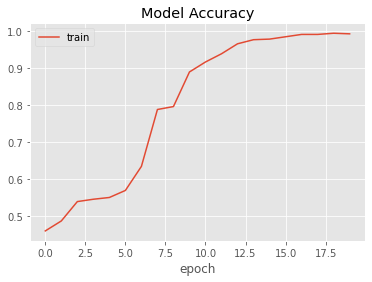

In [43]:
plt.plot(history.history["accuracy"])
plt.title("Model Accuracy")
plt.xlabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train"],loc="upper left")
plt.show()

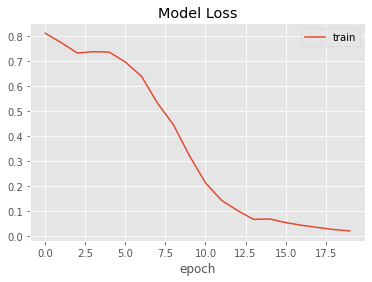

In [44]:
plt.plot(history.history["loss"])
plt.title("Model Loss")
plt.xlabel("Loss")
plt.xlabel("epoch")
plt.legend(["train"],loc="upper right")
plt.show()

In [45]:
y_pred = model.predict(X_test) #getting predictions on the trained model
y_pred = (y_pred > 0.5)


10/10 [==============================] - 1s 62ms/step


<Figure size 432x288 with 0 Axes>

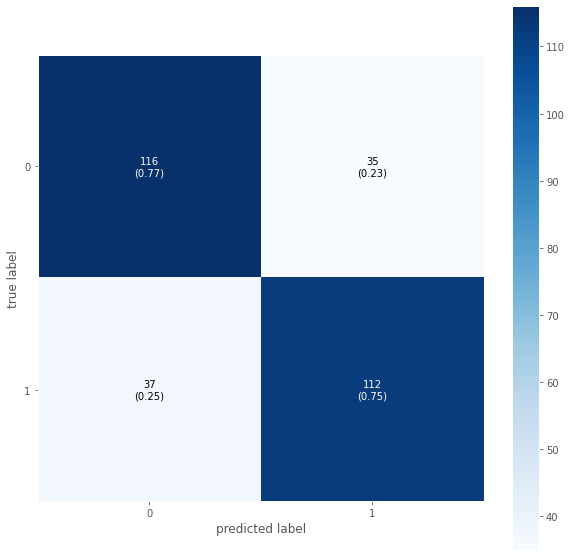

<Figure size 432x288 with 0 Axes>

In [46]:
CR=confusion_matrix(Y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.figure()